In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import codecs

In [ ]:
def provide_data(path):
    file1 = open(path, 'r')
    Lines = file1.read()
    data=Lines.splitlines()
    pairs = [tuple(line.split(' ')) for line in data]
    i=0

    sent=[]
    while i < len(pairs):
        a=[]
        while pairs[i] != ('',):
            a.append(pairs[i])
            i+=1
            if i==len(pairs):
                break
        sent.append(a)
        i+=1
    print('you have {} sent'.format(len(sent)))
    return sent



In [ ]:
path1='/content/drive/MyDrive/4_5861494894240992261.txt'
path2='/content/drive/MyDrive/4_5861494894240992262.txt'
train1=provide_data(path1)
train2=provide_data(path2)
train=train1+train2[1:]
len(train)

you have 9280 sent
you have 8722 sent


18001

In [ ]:
train_set,test_set =train_test_split(train,train_size=0.80,test_size=0.20,random_state = 101)
print(len(train_set),len(test_set))

14400 3601


In [ ]:
# Getting list of tagged words in training set
train_tagged_words = [tup for sent in train_set for tup in sent]

# Get length of total tagged words in training set
len(train_tagged_words)

415684

In [ ]:
# tokens
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]


['بچههاي', 'خارجي', 'همزمان', 'و', 'در', 'يك', 'زمان', 'زبان', 'هلندي', 'را']

In [ ]:
# vocabulary
V = set(tokens)
print(len(V))

27147


In [ ]:
# number of pos tags in the training corpus
T = set([pair[1] for pair in train_tagged_words])
print(len(T))
print(T)

23
{'PS', 'NP', 'PP', 'DEFAULT', 'CON', 'P', 'PRO', 'MS', 'V', 'DELM', 'AR', 'QUA', 'MQUA', 'MORP', 'IF', 'SPEC', 'ADV', 'ADJ', 'N', 'OHH', 'DET', 'OH', 'INT'}


In [ ]:
# Create numpy array of no of pos tags by total vocabulary
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [ ]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)

    return (count_w_given_tag, count_tag)

In [ ]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [ ]:
# creating t x t (pos tags x pos tags)transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)):
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [ ]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,PS,NP,PP,DEFAULT,CON,P,PRO,MS,V,DELM,AR,QUA,MQUA,MORP,IF,SPEC,ADV,ADJ,N,OHH,DET,OH,INT
PS,0.000000,0.000000,0.000000,0.000000,0.060606,0.303030,0.000000,0.000000,0.000000,0.575758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.000000
NP,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000
PP,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.026786,0.000000,0.142857,0.000000,0.000000,0.044643,0.000000,0.017857,0.000000,0.000000,0.000000,0.080357,0.678571,0.000000,0.000000,0.000000,0.000000
DEFAULT,0.000000,0.000000,0.000000,0.000000,0.060606,0.060606,0.060606,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.696970,0.000000,0.030303,0.000000,0.000000
CON,0.000087,0.000029,0.000378,0.000000,0.036029,0.187218,0.021449,0.000320,0.020721,0.010652,0.000175,0.014901,0.000669,0.000029,0.004162,0.001426,0.035622,0.104479,0.542737,0.000029,0.018829,0.000058,0.000000
P,0.000000,0.000118,0.000059,0.000000,0.005410,0.042096,0.038542,0.000513,0.012143,0.007404,0.000039,0.015401,0.000020,0.000020,0.000020,0.001955,0.004995,0.022845,0.802354,0.000000,0.046065,0.000000,0.000000
PRO,0.000000,0.000000,0.001716,0.000000,0.082506,0.339953,0.011156,0.000000,0.133382,0.033346,0.000123,0.004536,0.000368,0.000000,0.000245,0.000613,0.023783,0.099179,0.262842,0.000000,0.006252,0.000000,0.000000
MS,0.000000,0.000000,0.000000,0.000000,0.077670,0.092233,0.000000,0.000000,0.072816,0.286408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004854,0.121359,0.344660,0.000000,0.000000,0.000000,0.000000
V,0.000030,0.000000,0.000213,0.000030,0.276757,0.068596,0.004683,0.000030,0.031987,0.534025,0.000213,0.002220,0.000061,0.000000,0.000699,0.000213,0.008483,0.011037,0.056981,0.000030,0.003649,0.000061,0.000000
DELM,0.000650,0.000000,0.000488,0.000488,0.076210,0.116963,0.017787,0.001416,0.013027,0.068199,0.003831,0.007802,0.000279,0.000023,0.004760,0.000790,0.024869,0.041542,0.593382,0.000070,0.027029,0.000232,0.000139


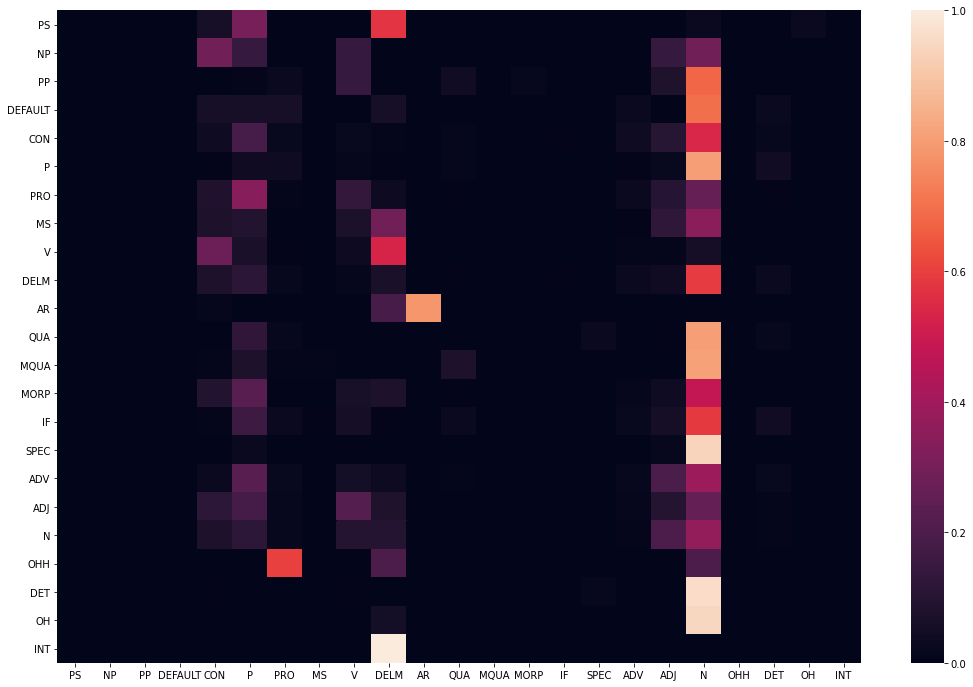

In [ ]:
# heatmap of tags matrix
# T(i, j) indicates P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

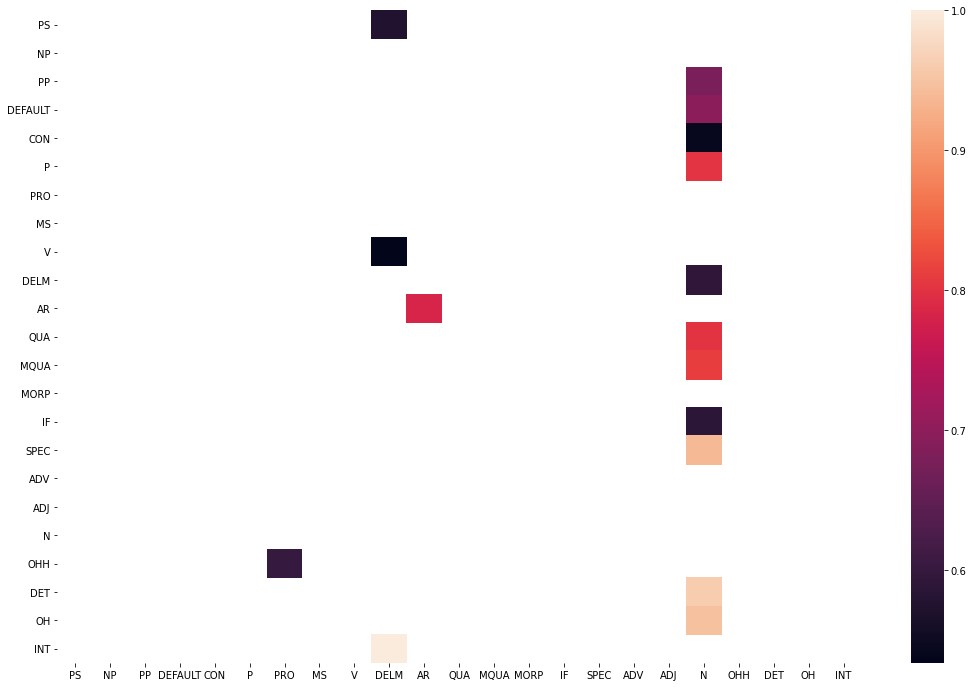

In [ ]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [ ]:
#Get total length of tagged words in training corpus
len(train_tagged_words)

415684

In [ ]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)

        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
enumerate(['ahmad','ali',''])